In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/state-population/state_pop.csv
/kaggle/input/indian-stat/Indian_states.shp
/kaggle/input/indian-stat/Indian_states.prj
/kaggle/input/indian-stat/Indian_states.dbf
/kaggle/input/indian-stat/Indian_states.shx
/kaggle/input/statedataset/state_2013.csv
/kaggle/input/statedataset/state_2012.csv
/kaggle/input/statedataset/state_2018.csv
/kaggle/input/statedataset/state_2015.csv
/kaggle/input/statedataset/state_2016.csv
/kaggle/input/statedataset/state_2017.csv
/kaggle/input/statedataset/state_2014.csv
/kaggle/input/statedataset/state_2011.csv
/kaggle/input/statedataset/state_2010.csv
/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_201

In [18]:
s_10 = pd.read_csv('/kaggle/input/statedataset/state_2010.csv')
s_11 = pd.read_csv('/kaggle/input/statedataset/state_2011.csv')
s_12 = pd.read_csv('/kaggle/input/statedataset/state_2012.csv')
s_13 = pd.read_csv('/kaggle/input/statedataset/state_2013.csv')
s_14 = pd.read_csv('/kaggle/input/statedataset/state_2014.csv')
s_15 = pd.read_csv('/kaggle/input/statedataset/state_2015.csv')
s_16 = pd.read_csv('/kaggle/input/statedataset/state_2016.csv')
s_17 = pd.read_csv('/kaggle/input/statedataset/state_2017.csv')
s_18 = pd.read_csv('/kaggle/input/statedataset/state_2018.csv')

In [19]:
s_10.rename(columns={'ddl_case_id': 'cases_2010'}, inplace=True)
s_11.rename(columns={'ddl_case_id': 'cases_2011'}, inplace=True)
s_12.rename(columns={'ddl_case_id': 'cases_2012'}, inplace=True)
s_13.rename(columns={'ddl_case_id': 'cases_2013'}, inplace=True)
s_14.rename(columns={'ddl_case_id': 'cases_2014'}, inplace=True)
s_15.rename(columns={'ddl_case_id': 'cases_2015'}, inplace=True)
s_16.rename(columns={'ddl_case_id': 'cases_2016'}, inplace=True)
s_17.rename(columns={'ddl_case_id': 'cases_2017'}, inplace=True)
s_18.rename(columns={'ddl_case_id': 'cases_2018'}, inplace=True)

In [20]:
state_pop = pd.read_csv('/kaggle/input/state-population/state_pop.csv')
state_pop.rename(columns={'State/Union Territory':'st_nm'}, inplace=True)
print(state_pop)

                       st_nm    2011
0   Andaman & Nicobar Island     381
1             Andhra Pradesh   84581
2         Arunanchal Pradesh    1384
3                      Assam   31206
4                      Bihar  104099
5                 Chandigarh    1055
6               Chhattisgarh   25545
7     Dadara & Nagar Havelli     344
8                Daman & Diu     243
9               NCT of Delhi   16788
10                       Goa    1459
11                   Gujarat   60440
12                   Haryana   25351
13          Himachal Pradesh    6865
14           Jammu & Kashmir   12541
15                 Jharkhand   32988
16                 Karnataka   61095
17                    Kerala   33406
18               Lakshadweep      64
19            Madhya Pradesh   72627
20               Maharashtra  112374
21                   Manipur    2856
22                 Meghalaya    2967
23                   Mizoram    1097
24                  Nagaland    1979
25                    Odisha   41974
2

In [21]:
s_10['2010'] = s_10['cases_2010']/state_pop['2011']
s_11['2011'] = s_11['cases_2011']/state_pop['2011']
s_12['2012'] = s_12['cases_2012']/state_pop['2011']
s_13['2013'] = s_13['cases_2013']/state_pop['2011']
s_14['2014'] = s_14['cases_2014']/state_pop['2011']
s_15['2015'] = s_15['cases_2015']/state_pop['2011']
s_16['2016'] = s_16['cases_2016']/state_pop['2011']
s_17['2017'] = s_17['cases_2017']/state_pop['2011']
s_18['2018'] = s_18['cases_2018']/state_pop['2011']

In [22]:
s_10 = s_10.drop('cases_2010', axis=1)
s_11 = s_11.drop('cases_2011', axis=1)
s_12 = s_12.drop('cases_2012', axis=1)
s_13 = s_13.drop('cases_2013', axis=1)
s_14 = s_14.drop('cases_2014', axis=1)
s_15 = s_15.drop('cases_2015', axis=1)
s_16 = s_16.drop('cases_2016', axis=1)
s_17 = s_17.drop('cases_2017', axis=1)
s_18 = s_18.drop('cases_2018', axis=1)

In [23]:
m1 = s_10.merge(s_11, left_on="st_nm", right_on="st_nm", how="left")
m2 = m1.merge(s_12, left_on="st_nm", right_on="st_nm", how="left")
m3 = m2.merge(s_13, left_on="st_nm", right_on="st_nm", how="left")
m4 = m3.merge(s_14, left_on="st_nm", right_on="st_nm", how="left")
m5 = m4.merge(s_15, left_on="st_nm", right_on="st_nm", how="left")
m6 = m5.merge(s_16, left_on="st_nm", right_on="st_nm", how="left")
m7 = m6.merge(s_17, left_on="st_nm", right_on="st_nm", how="left")
m8 = m7.merge(s_18, left_on="st_nm", right_on="st_nm", how="left")
m8.set_index('st_nm', inplace=True)
print(m8)

                                  2010          2011          2012  \
st_nm                                                                
Andaman & Nicobar Island      0.000000      0.000000      0.000000   
Arunanchal Pradesh            0.000000      0.000000      0.000000   
Assam                        34.614162     52.191474     65.996387   
Bihar                         4.492662      5.523874      6.971127   
Chandigarh                    0.099108      0.144151      0.188090   
Chhattisgarh                  9.696682     36.104265     72.573460   
Dadara & Nagar Havelli        0.024114      0.026228      0.030926   
Daman & Diu                   1.395349      1.712209      3.872093   
Goa                         104.082305     98.304527    109.621399   
Gujarat                      19.589707     22.246426     27.042233   
Haryana                      78.502399    123.549692    153.361206   
Himachal Pradesh              0.472220      0.734298      1.026456   
Jammu & Kashmir     

In [24]:
m20 = m8.iloc[:, 0:].T
print(m20)

st_nm  Andaman & Nicobar Island  Arunanchal Pradesh       Assam      Bihar  \
2010                        0.0                 0.0   34.614162   4.492662   
2011                        0.0                 0.0   52.191474   5.523874   
2012                        0.0                 0.0   65.996387   6.971127   
2013                        0.0                 0.0   80.700867   9.188457   
2014                        0.0                 0.0   95.093931  11.377780   
2015                        0.0                 0.0  112.531792  12.122829   
2016                        0.0                 0.0  112.675578  12.467186   
2017                        0.0                 0.0  154.987717  15.357912   
2018                        0.0                 0.0  153.731936  19.633244   

st_nm  Chandigarh  Chhattisgarh  Dadara & Nagar Havelli  Daman & Diu  \
2010     0.099108      9.696682                0.024114     1.395349   
2011     0.144151     36.104265                0.026228     1.712209   
201

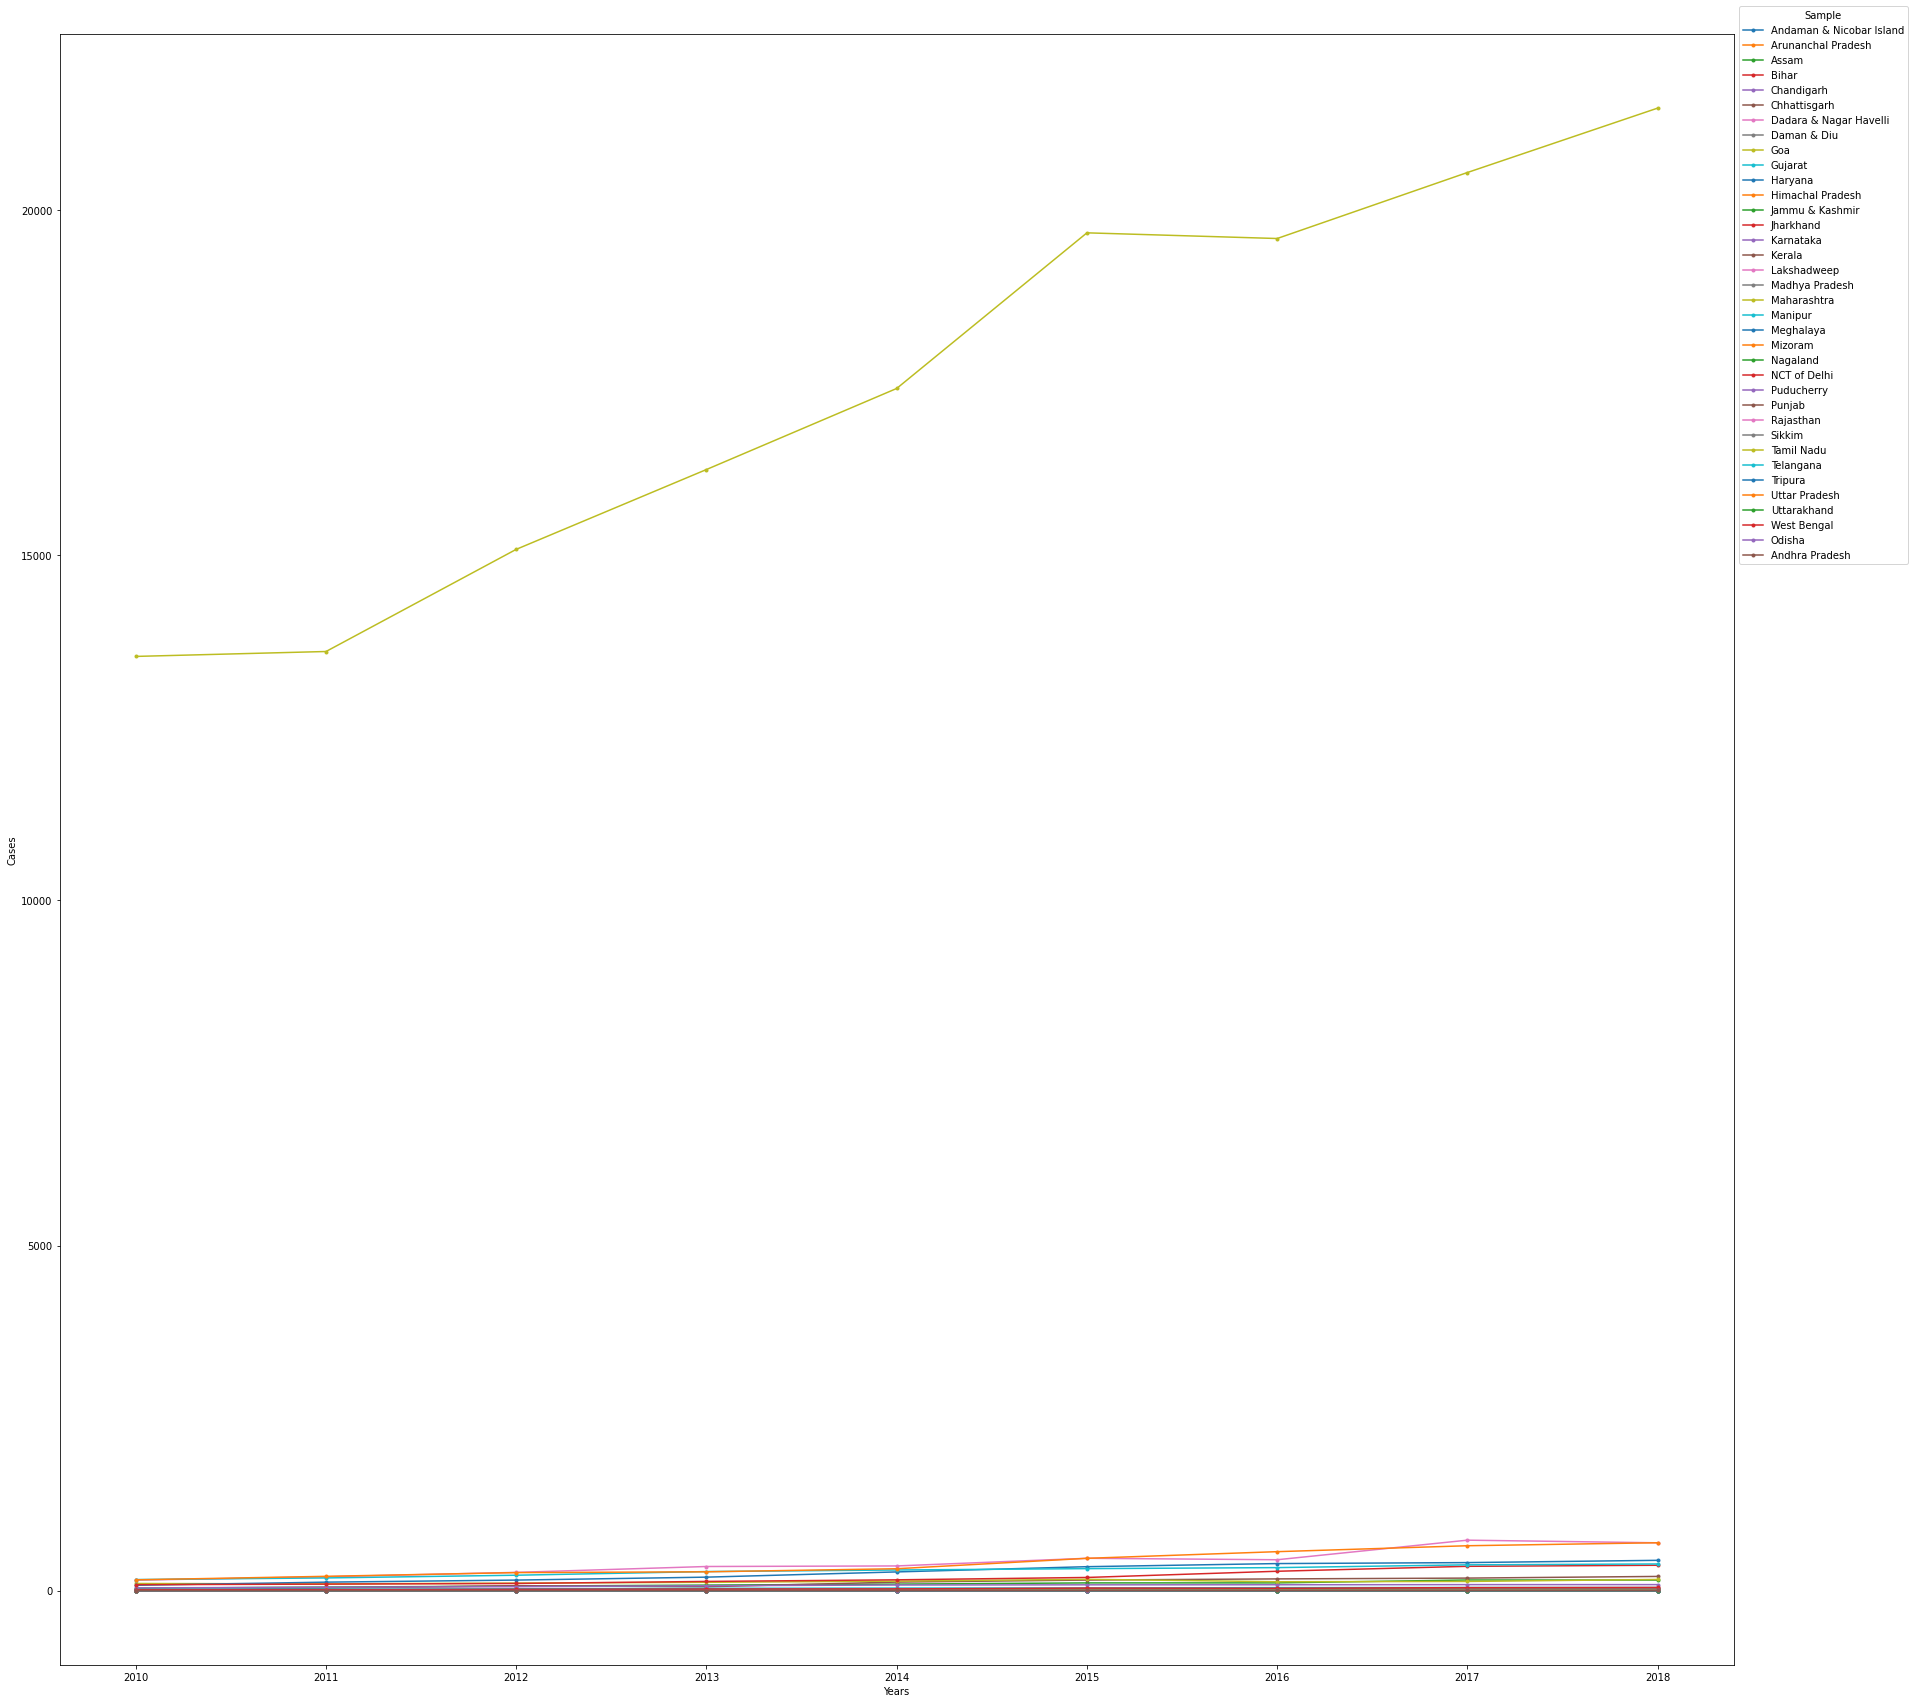

In [26]:
ax = m20.plot(xlabel='Years', ylabel='Cases',figsize=(30,30), marker='.')
ax.legend(title='Sample', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.pyplot.savefig('state_cumm_trend_withpop_withMaha.png')

In [27]:
m21 = m20.drop('Maharashtra', axis=1)

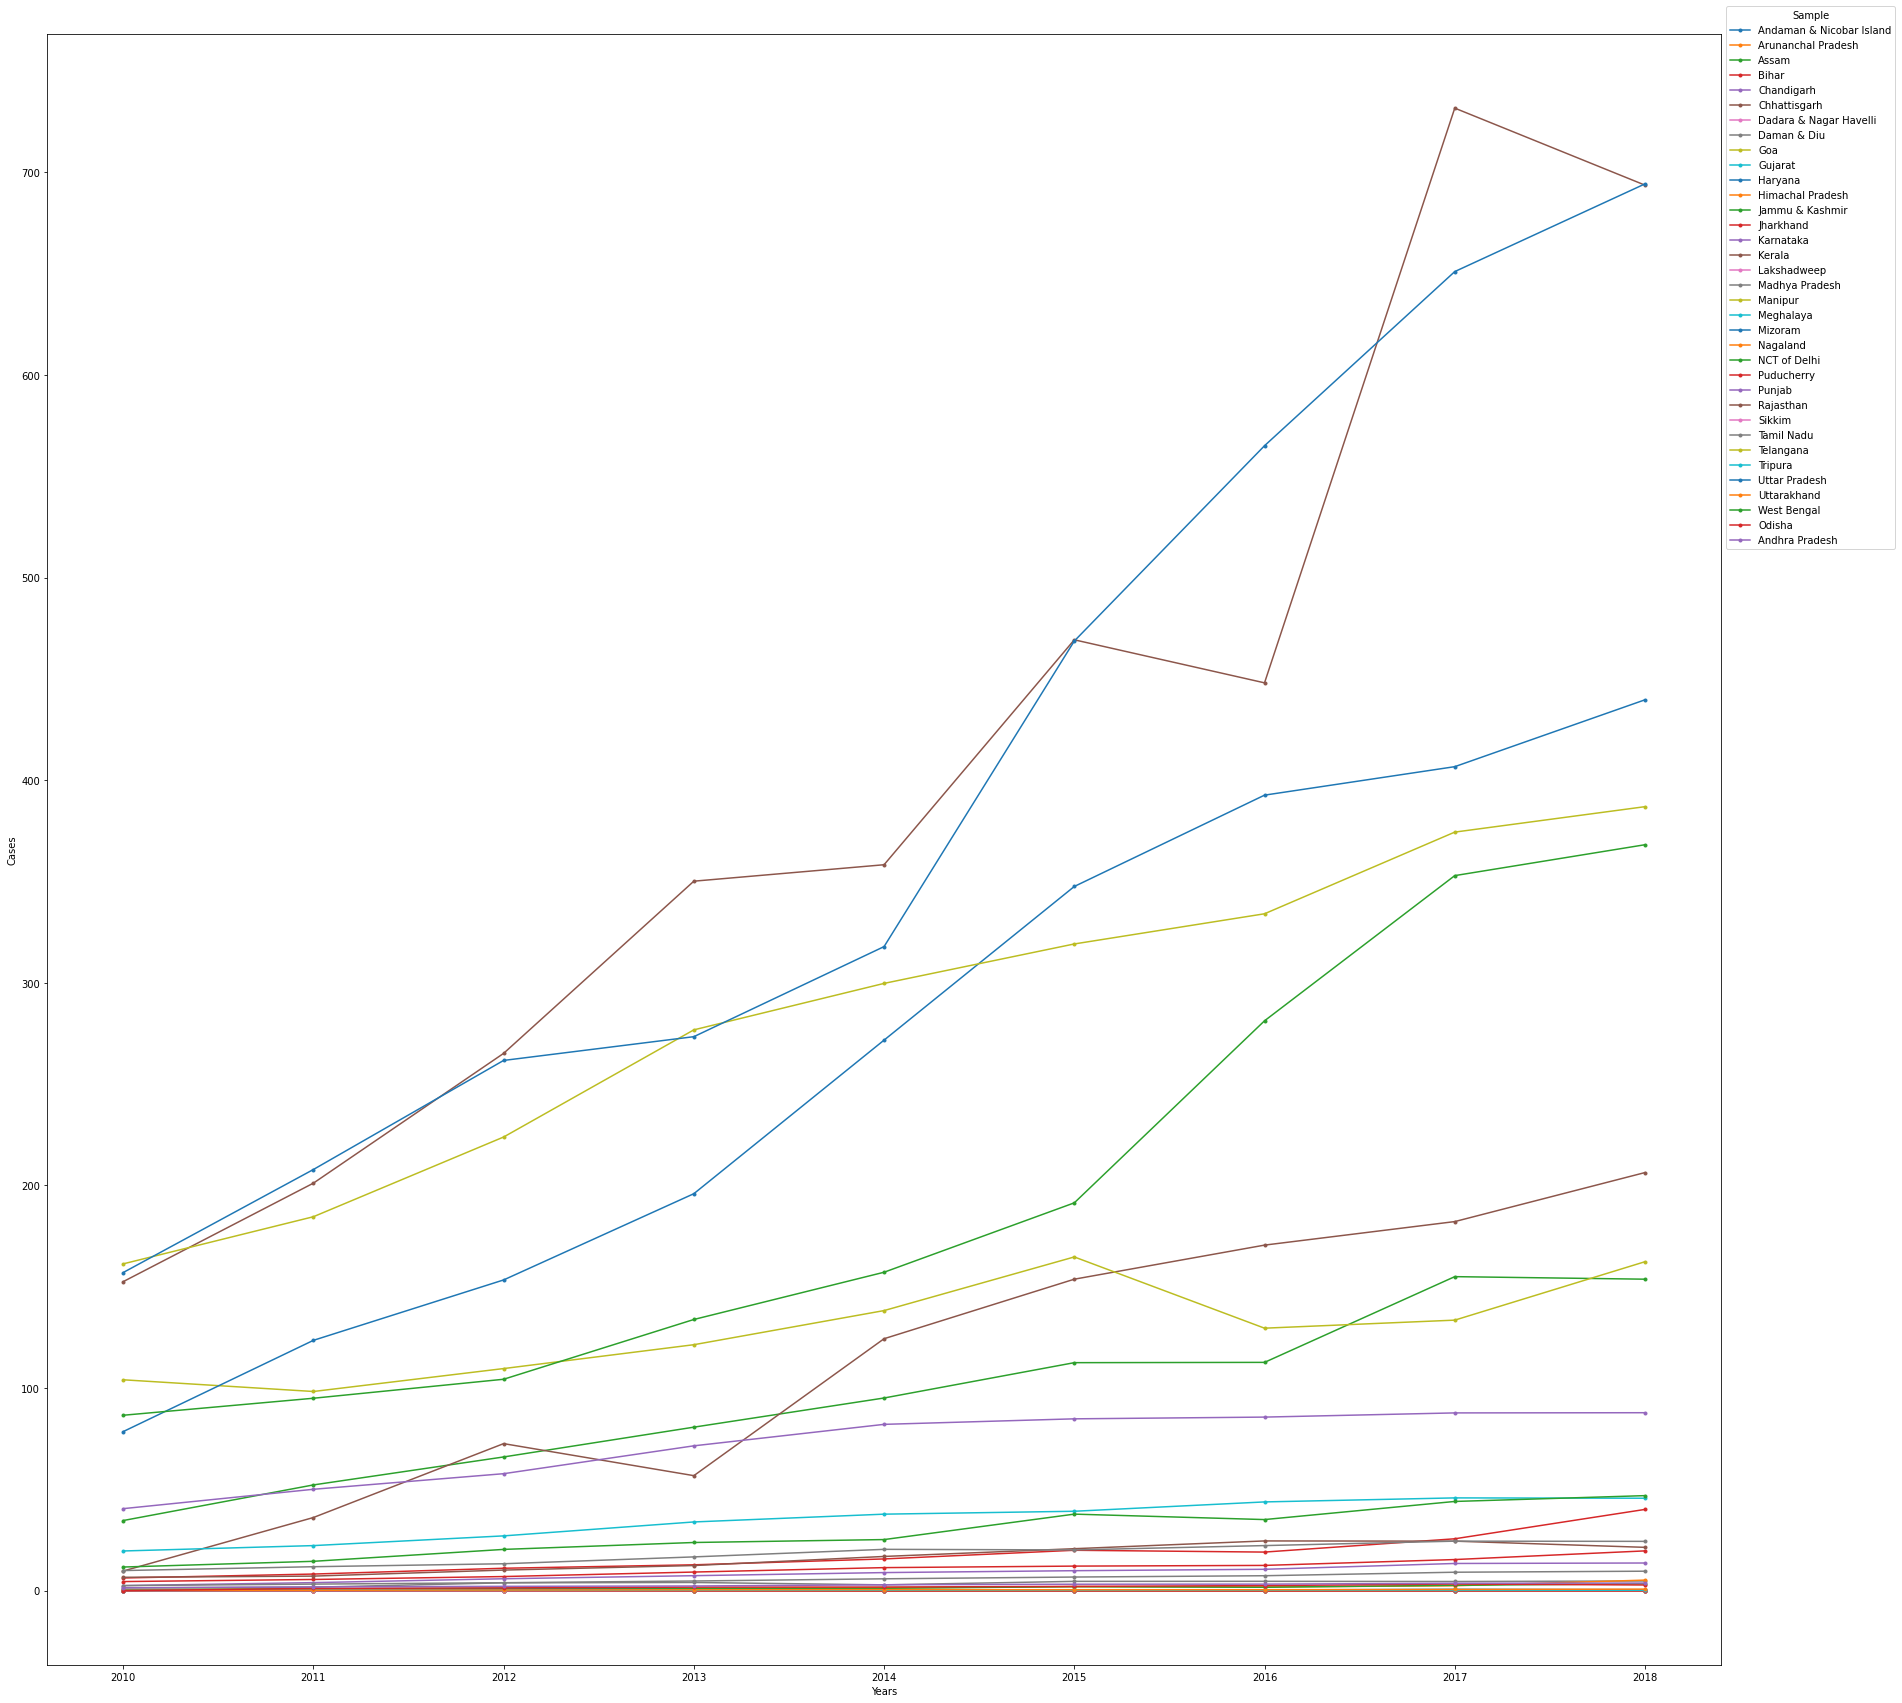

In [28]:
ax2 = m21.plot(xlabel='Years', ylabel='Cases',figsize=(30,30), marker='.')
ax2.legend(title='Sample', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.pyplot.savefig('state_cumm_trend_withpop_withoutMaha.png')